In [1]:
import pandas as pd
import numpy as np

# Балансировка
from imblearn.over_sampling import SMOTE

# Разделение на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split

# Классификаторы
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree

# Оценка качества
from yellowbrick.classifier import ROCAUC
from catboost.utils import get_confusion_matrix
from yellowbrick.contrib.wrapper import wrap

# Визуализация результатов обучения
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from yellowbrick.classifier import ConfusionMatrix
import matplotlib.pyplot as plt


### Классификация

In [2]:
data = pd.read_csv("opros_molodeshi.csv")
pd.set_option("display.max.columns", None)
data.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,Reading,Geography,Foreign languages,Medicine,Law,Cars,Art exhibitions,Religion,"Countryside, outdoors",Dancing,Musical instruments,Writing,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking,Smoking,Alcohol,Healthy eating,Daily events,Prioritising workload,Writing notes,Workaholism,Thinking ahead,Final judgement,Reliability,Keeping promises,Loss of interest,Friends versus money,Funniness,Fake,Criminal damage,Decision making,Elections,Self-criticism,Judgment calls,Hypochondria,Empathy,Eating to survive,Giving,Compassion to animals,Borrowed stuff,Loneliness,Cheating in school,Health,Changing the past,God,Dreams,Charity,Number of friends,Punctuality,Lying,Waiting,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Internet usage,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,3.0,1.0,2.0,1.0,5.0,1.0,3.0,3.0,5.0,3.0,5.0,3.0,3.0,3.0,3.0,5.0,3.0,1.0,1.0,1.0,1.0,5.0,3.0,3.0,2.0,1.0,5.0,5.0,1.0,4.0,4.0,2.0,5.0,4.0,4.0,1.0,1.0,1.0,1.0,1.0,5,3.0,1.0,3.0,2.0,never smoked,drink a lot,4.0,2.0,2.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,3.0,5.0,1.0,1.0,3.0,4.0,1.0,3.0,1.0,3.0,1,4.0,5.0,4.0,3.0,2.0,1.0,1.0,1.0,4,2.0,3,i am always on time,never,3.0,4.0,3.0,4.0,3.0,4.0,3.0,5.0,1.0,1.0,3.0,5.0,5.0,1.0,4.0,5.0,1.0,4.0,3.0,2.0,3.0,4.0,3.0,few hours a day,3.0,4.0,5.0,3.0,3.0,1,3.0,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,4.0,1.0,3.0,1.0,4.0,4.0,2.0,1.0,1.0,5.0,2.0,2.0,4.0,3.0,4.0,1.0,3.0,5.0,4.0,1.0,4.0,1.0,3.0,4.0,5.0,2.0,4.0,4.0,5.0,1.0,1.0,4.0,4.0,5.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,3.0,2.0,4.0,2.0,5.0,1.0,1.0,1.0,2.0,1.0,1,1.0,3.0,1.0,4.0,never smoked,drink a lot,3.0,3.0,2.0,4.0,5.0,4.0,1.0,4.0,4.0,3.0,4.0,3.0,2.0,1.0,2.0,5.0,4.0,4.0,1.0,2.0,1,2.0,4.0,3.0,2.0,4.0,4.0,4.0,1.0,3,1.0,3,i am often early,sometimes,3.0,4.0,4.0,4.0,4.0,2.0,4.0,2.0,2.0,5.0,4.0,4.0,4.0,1.0,4.0,3.0,5.0,3.0,4.0,5.0,3.0,2.0,3.0,few hours a day,3.0,4.0,1.0,4.0,2.0,5,2.0,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,4.0,1.0,4.0,3.0,5.0,5.0,5.0,1.0,3.0,5.0,3.0,4.0,4.0,2.0,4.0,2.0,5.0,5.0,2.0,2.0,1.0,1.0,2.0,1.0,5.0,2.0,4.0,2.0,4.0,1.0,1.0,5.0,2.0,5.0,2.0,3.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,2.0,1.0,1.0,4.0,2.0,5.0,5.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,1,1.0,1.0,1.0,2.0,tried smoking,drink a lot,3.0,1.0,2.0,5.0,3.0,5.0,3.0,4.0,5.0,1.0,5.0,2.0,4.0,1.0,3.0,5.0,4.0,4.0,1.0,5.0,5,5.0,4.0,2.0,5.0,3.0,2.0,5.0,5.0,1,3.0,3,i am often running late,sometimes,2.0,3.0,4.0,3.0,5.0,3.0,4.0,4.0,3.0,4.0,3.0,2.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,4.0,5.0,3.0,1.0,few hours a day,2.0,4.0,1.0,4.0,3.0,4,2.0,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,4.0,2.0

In [5]:
df = data[["Finances","Shopping centres","Branded clothing","Entertainment spending","Spending on looks","Spending on gadgets","Spending on healthy eating","Gender"]]
df

,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Gender
0,3.0,4.0,5.0,3.0,3.0,1,3.0,female
1,3.0,4.0,1.0,4.0,2.0,5,2.0,female
2,2.0,4.0,1.0,4.0,3.0,4,2.0,female
3,2.0,4.0,3.0,3.0,4.0,4,1.0,female
4,4.0,3.0,4.0,3.0,3.0,2,4.0,female
...,...,...,...,...,...,...,...,...
1005,3.0,5.0,4.0,3.0,4.0,3,4.0,female
1006,3.0,1.0,1.0,1.0,1.0,5,3.0,male
1007,1.0,2.0,5.0,2.0,2.0,2,5.0,female
1008,3.0,2.0,1.0,5.0,3.0,3,3.0,female


Для классификации возьмём столбцы-признаки "Привычки тратить" среди молодежи и целевой столбец "Пол".

In [6]:
df.isnull().sum()


Finances                      3
Shopping centres              2
Branded clothing              2
Entertainment spending        3
Spending on looks             3
Spending on gadgets           0
Spending on healthy eating    2
Gender                        6
dtype: int64

Видим, что у нас есть пропуски, поэтому избавимся от них и от дубликатов, если они есть.

In [7]:
df = df.drop_duplicates()  # удаление дубликатов
# заполнение пропусков у количественных переменных
df["Finances"] = df["Finances"].fillna(0)
df["Shopping centres"] = df["Shopping centres"].fillna(0)
df["Branded clothing"] = df["Branded clothing"].fillna(0)
df["Entertainment spending"] = df["Entertainment spending"].fillna(0)
df["Spending on looks"] = df["Spending on looks"].fillna(0)
df["Spending on healthy eating"] = df["Spending on healthy eating"].fillna(0)
df["Gender"] = df["Gender"].fillna(0)
df = df.replace({np.nan: "Неизвестно"})


C:\Users\Admin\AppData\Local\Temp\ipykernel_15752\1094545839.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Finances"] = df["Finances"].fillna(0)
C:\Users\Admin\AppData\Local\Temp\ipykernel_15752\1094545839.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Shopping centres"] = df["Shopping centres"].fillna(0)
C:\Users\Admin\AppData\Local\Temp\ipykernel_15752\1094545839.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

В нашей классификации будем прогнозировать, как пол человека влияет на финансовые траты.

In [9]:
df['Gender'] = [1 if x =="male" else 0 for x in df['Gender']]#преобразуем целевой столбец, 1 - мужчина, 0 - женщина.


In [11]:
unique, counts = np.unique(df["Gender"], return_counts=True)
unique, counts


(array([0, 1], dtype=int64), array([564, 387], dtype=int64))

In [12]:
#Разделим набор данных на признаки и метки
y = df[['Gender']]
X = df.drop(columns=['Gender'])


In [13]:
# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [14]:
from fedot.api.main import Fedot
from sklearn.metrics import classification_report, roc_auc_score


2023-01-10 17:53:37,773 - ApiComposer - Initial pipeline was fitted in 0.2 sec.
2023-01-10 17:53:37,778 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 5.0 min. Set of candidate models: ['bernb', 'dt', 'knn', 'lgbm', 'logit', 'mlp', 'qda', 'rf', 'scaling', 'normalization', 'pca', 'fast_ica', 'poly_features', 'isolation_forest_class', 'resample'].
2023-01-10 17:53:37,781 - ApiComposer - Pipeline composition started.


Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]

2023-01-10 17:56:39,898 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|          | 1/10000 [03:02<?, ?gen/s]

2023-01-10 17:56:39,903 - ApiComposer - Hyperparameters tuning started with 2 min. timeout


2023-01-10 17:56:40,572 - PipelineTuner - Initial pipeline: {'depth': 2, 'length': 2, 'nodes': [rf, resample]}
rf - {'n_jobs': 1, 'criterion': 'gini', 'max_features': 0.09936533989392234, 'min_samples_split': 6, 'min_samples_leaf': 10, 'bootstrap': False}
resample - {'balance': 'expand_minority', 'replace': False, 'balance_ratio': 0.7364315085809302} 
Initial metric: 0.696
  0%|          | 154/100000 [01:57<21:16:35,  1.30trial/s, best loss: -0.7171628]        
2023-01-10 17:58:39,273 - PipelineTuner - Final pipeline: {'depth': 2, 'length': 2, 'nodes': [rf, resample]}
rf - {'n_jobs': 1, 'bootstrap': True, 'criterion': 'entropy', 'max_features': 0.35750978591887267, 'min_samples_leaf': 14, 'min_samples_split': 3}
resample - {'balance': 'reduce_majority', 'replace': False, 'balance_ratio': 0.703850204543699}
2023-01-10 17:58:39,274 - PipelineTuner - Final metric: 0.695
2023-01-10 17:58:39,275 - ApiComposer - Hyperparameters tuning finished
2023-01-10 17:58:39,390 - ApiComposer - Model ge

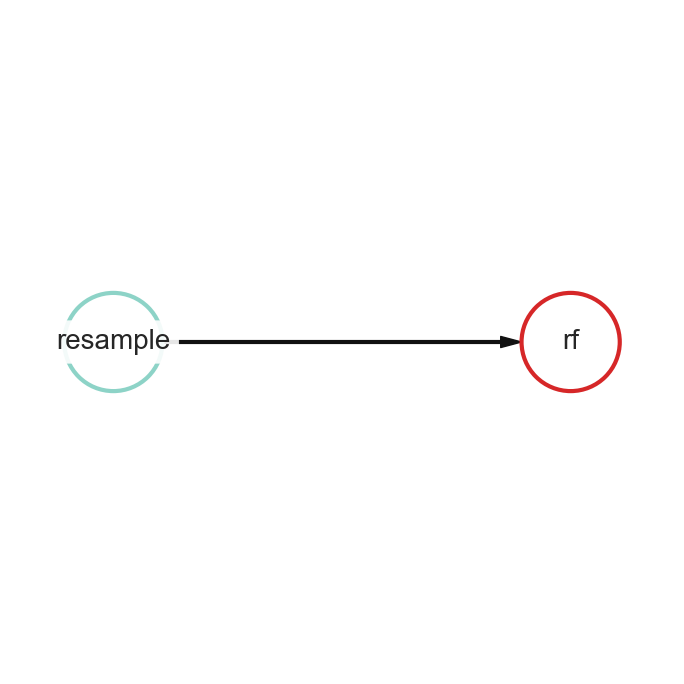

In [15]:
fedot_model = Fedot(problem='classification')

# Fit model
obtained_pipeline = fedot_model.fit(
    features=X_train, target=y_train)
obtained_pipeline.show()

# Make predictions
predict = fedot_model.predict(X_test)
predict_probs = fedot_model.predict_proba(X_test)



Видим, что финальная метрика у нас 0,695

Также используем метрики,которые подходят для бинарной кассификации.

In [16]:
from sklearn.metrics import roc_auc_score, roc_curve, f1_score

print(
    f"Оценка качества модели по метрике F1-score: {f1_score(y_test, fedot_model.predict(X_test))}")
print(
    f"Оценка качества модели по метрике ROC AUC: {roc_auc_score(y_test, fedot_model.predict(X_test))}")


Оценка качества модели по метрике F1-score: 0.6193548387096774
Оценка качества модели по метрике ROC AUC: 0.6797082228116711


#### Confusion Matrix

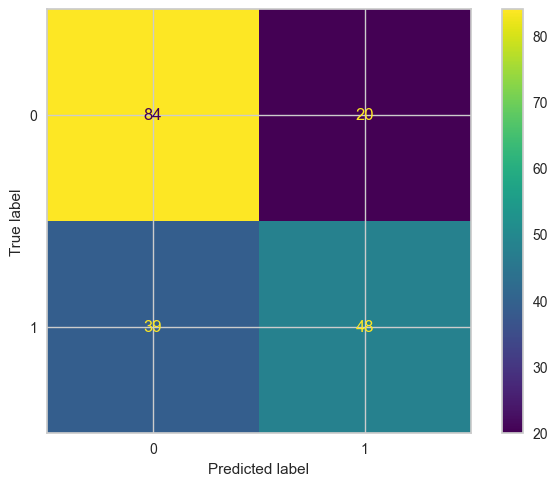

In [17]:
import matplotlib.pyplot as plt
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(
    y_test, fedot_model.predict(X_test))

cm_display = metrics.ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix, display_labels=[0, 1])

cm_display.plot()
plt.show()


#### ROC-Curve


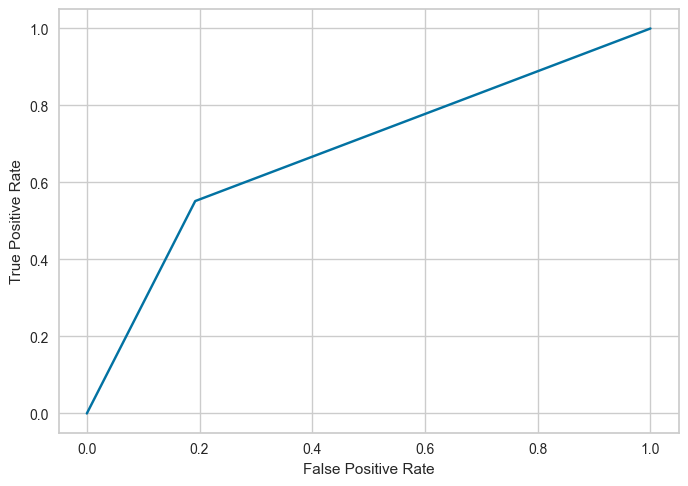

In [18]:
def plot_roc_curve(true_y, y_prob):

    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')


plot_roc_curve(y_test, fedot_model.predict(X_test))


#### Построим модель классификации без AutoML

In [20]:
df['Gender'].value_counts()


0    564
1    387
Name: Gender, dtype: int64

Видим что значения не распределены поровну, поэтому проведём балансировку.

In [21]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42, k_neighbors=5)
X_res, y_res = sm.fit_resample(X, y)


In [22]:
#тестовые и тренировочные выборки
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.2)


#### Обучим при помощи RandomForestClassifier

In [23]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

Проверим качество собственной модели.

In [24]:
print(
    f"Оценка качества модели по метрике F1-score: {f1_score(y_test, rf.predict(X_test))}")
print(
    f"Оценка качества модели по метрике ROC AUC: {roc_auc_score(y_test, rf.predict(X_test))}")


Оценка качества модели по метрике F1-score: 0.7272727272727273
Оценка качества модели по метрике ROC AUC: 0.7240699873896594


#### Confusion matrix 

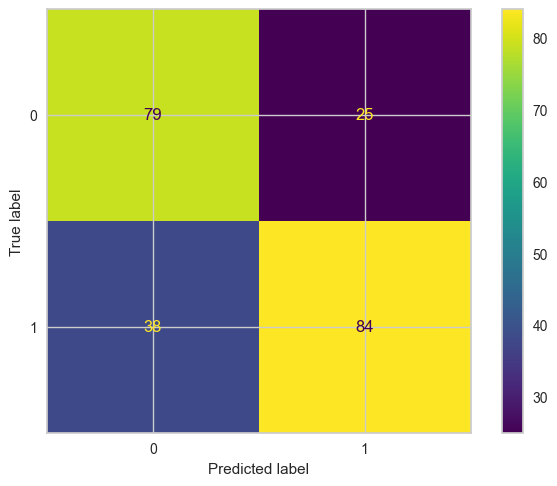

In [25]:
import matplotlib.pyplot as plt
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, rf.predict(X_test))

cm_display = metrics.ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix, display_labels=[0, 1])

cm_display.plot()
plt.show()


#### ROC-Curve

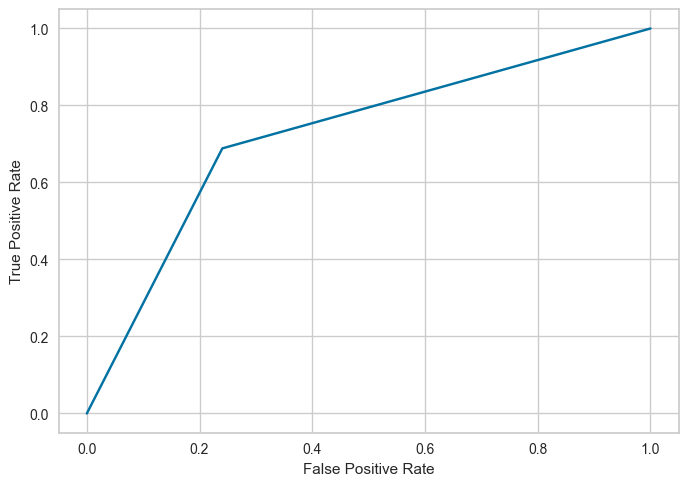

In [26]:
def plot_roc_curve(true_y, y_prob):

    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')


plot_roc_curve(y_test, rf.predict(X_test))


Из-за того, что мы провели балансировку мы видим, что качество нашей модели повысилось.